#### Fall 2021 | COMP 4721

## Mini-Project 1

#### Wei Chen Huang, Ian Phillips, Beatrice Cobo
---

### Task 1

import statements for necessary libraries

In [52]:
import numpy as np
import os
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from pandas import *
%matplotlib inline

2. Plot the distribution of the instances in each class and save the graphic in a file called BBC-distribution.pdf.
You may want to use matplotlib.pyplot and savefig to do this. This pre-analysis of the data set will
allow you to determine if the classes are balanced, and which metric is more appropriate to use to evaluate
the performance of your classifier.

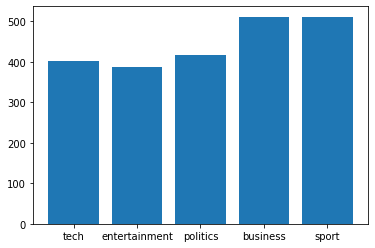

In [2]:
datadir="BBC"
categories=["tech", "entertainment", "politics", "business", "sport"]
txt_array=[];
all_array=[];
for category in categories:  # for each class
    path = os.path.join(datadir,category)  # create path to class
    for txt in os.listdir(path):  # iterate over each text file per class
        txt_array.append(txt)
    all_array.append(len(txt_array))
    txt_array=[]
fig = plt.figure()
plt.bar(categories,all_array)
fig.savefig('BBC-distribution.pdf', dpi=fig.dpi)

3. Load the corpus using load files and make sure you set the encoding to latin1. This will read the file
structure and assign the category name to each file from their parent directory name.

In [3]:
corpus=load_files(container_path=datadir,encoding="latin1")

4. Pre-process the dataset to have the features ready to be used by a multinomial Naive Bayes classifier. This
means that the frequency of each word in each class must be computed and stored in a term-document
matrix. For this, you can use feature extraction.text.CountVectorizer.

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus.data)

5. Split the dataset into 80% for training and 20% for testing. For this, you must use train test split with
the parameter random state set to None.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,corpus.target, test_size=0.2,random_state=None)

6. Train a multinomial Naive Bayes Classifier (naive bayes.MultinomialNB) on the training set using the
default parameters and evaluate it on the test set.

In [6]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

7. In a file called bbc-performance.txt, save the following information: (to make it easier for the TAs, make
sure that your output for each sub-question below is clearly marked in your output file, using the headings
(a), (b) . . .)


(b) the confusion matrix (you can use confusion matrix)

In [7]:
cmatrix = confusion_matrix(y_test, predicted)

(c) the precision, recall, and F1-measure for each class (you can use classification report)


In [8]:
classificationReport = classification_report(y_test, predicted, target_names=corpus.target_names)
print(classificationReport)

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       1.00      0.90      0.95        68
     politics       0.93      0.97      0.95        80
        sport       1.00      1.00      1.00       101
         tech       0.92      0.99      0.95        81

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.97      0.96      0.96       445



(d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score
and f1 score)

In [9]:
accuracyScore = accuracy_score(y_test, predicted)
macroF1Score = f1_score(y_test, predicted, average='macro')
weightedF1Score = f1_score(y_test, predicted, average='weighted')

(e) the prior probability of each class

In [10]:
priors = [x / (len(corpus.target)) for x in all_array]


(f) the size of the vocabulary (i.e. the number of different words)

In [11]:
vocabularyLength = len((vectorizer.vocabulary_))

(g) the number of word-tokens in each class (i.e. the number of words in total)

In [12]:
enter_arr=[]
tech_arr=[]
sport_arr=[]
politics_arr=[]
business_arr=[]
i = 0

arr={'business':[],'entertainment':[],'politics':[],'sport':[],'tech':[]}
    
for data in corpus.target:  # for each class
    if(data==0):
        arr['business'].append(corpus.data[i])
    if(data==1):
        arr['entertainment'].append(corpus.data[i])
    if(data==2):
        arr['politics'].append(corpus.data[i])
    if(data==3):
        arr['sport'].append(corpus.data[i])
    if(data==4):
        arr['tech'].append(corpus.data[i])
    i=i+1;

total_business=0
total_entertainment=0
total_politics=0
total_sport=0
total_tech=0

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['business'])
business_arr=vectorizer2.vocabulary_
for b in business_arr:
    total_business+=vectorizer2.vocabulary_.get(b)

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['entertainment'])
entertainment_arr=vectorizer2.vocabulary_
for e in entertainment_arr:
    total_entertainment+=vectorizer2.vocabulary_.get(e)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['politics'])
politics_arr=vectorizer2.vocabulary_
for p in politics_arr:
    total_politics+=vectorizer2.vocabulary_.get(p)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['sport'])
sport_arr=vectorizer2.vocabulary_
for s in sport_arr:
    total_sport+=vectorizer2.vocabulary_.get(s)

vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['tech'])
tech_arr=vectorizer2.vocabulary_
for t in tech_arr:
    total_tech+=vectorizer2.vocabulary_.get(t)

print(total_business)
print(total_entertainment)
print(total_politics)
print(total_sport)
print(total_tech)

70596903
68146975
62938590
55867735
73174753


(h) the number of word-tokens in the entire corpus

(i) the number and percentage of words with a frequency of zero in each class

(j) the number and percentage of words with a frequency of one in the entire corpus

(k) your 2 favorite words (that are present in the vocabulary) and their log-prob

Write to `bbc-performance.txt`

In [13]:
f = open('bbc-performance.txt', 'w')
f.write('MultinomialNB default values, try 1\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(DataFrame(cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(accuracyScore) + '\n')
f.write('macro average f1: ' + str(macroF1Score) + '\n')
f.write('weighted average: ' + str(weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('e) Prior Probabilities\n')
f.write('business: ' + str(priors[3]) + '\n')
f.write('entertainment: ' + str(priors[1]) + '\n')
f.write('politics: ' + str(priors[2]) + '\n')
f.write('sports: ' + str(priors[4]) + '\n')
f.write('tech: ' + str(priors[0]) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('f) Size of vocabulary\n')
f.write('size of vocabulary: ' + str(vocabularyLength) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('g) Number of words-tokens in each class\n')
f.write('business: ' + str(total_business) + '\n')
f.write('entertainment: ' + str(total_entertainment) + '\n')
f.write('politics: ' + str(total_politics) + '\n')
f.write('sport: ' + str(total_sport) + '\n')
f.write('tech: ' + str(total_tech) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('h) Number of words-tokens in entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('i) Number and percentage of words with a frequency of zero in each class\n')
f.write('business: ' + '\n')
f.write('entertainment: ' + '\n')
f.write('politics: ' + '\n')
f.write('sport: ' + '\n')
f.write('tech: ' + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('j) Number and percentage of words with a frequency of one in the entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('k) Our 2 favorite words and their log-prob \n')
f.write('---------------------------------------------------------------------------------\n')

82

8. Redo steps 6 and 7 without changing anything (do not redo step 5, the dataset split). Change the
model name to something like “MultinomialNB default values, try 2” and append the results to the file
bbc-performance.txt.

In [14]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

(b) the confusion matrix (you can use confusion matrix)

In [15]:
cmatrix = confusion_matrix(y_test, predicted)

(c) the precision, recall, and F1-measure for each class (you can use classification report)


In [16]:
classificationReport = classification_report(y_test, predicted, target_names=corpus.target_names)
print(classificationReport)

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       1.00      0.90      0.95        68
     politics       0.93      0.97      0.95        80
        sport       1.00      1.00      1.00       101
         tech       0.92      0.99      0.95        81

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.97      0.96      0.96       445



(d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score
and f1 score)

In [17]:
accuracyScore = accuracy_score(y_test, predicted)
macroF1Score = f1_score(y_test, predicted, average='macro')
weightedF1Score = f1_score(y_test, predicted, average='weighted')

(e) the prior probability of each class

In [18]:
priors = [x / (len(corpus.target)) for x in all_array]

(f) the size of the vocabulary (i.e. the number of different words)

In [19]:
vocabularyLength = len((vectorizer.vocabulary_))

(g) the number of word-tokens in each class (i.e. the number of words in total)

In [20]:
enter_arr=[]
tech_arr=[]
sport_arr=[]
politics_arr=[]
business_arr=[]
i = 0

arr={'business':[],'entertainment':[],'politics':[],'sport':[],'tech':[]}
    
for data in corpus.target:  # for each class
    if(data==0):
        arr['business'].append(corpus.data[i])
    if(data==1):
        arr['entertainment'].append(corpus.data[i])
    if(data==2):
        arr['politics'].append(corpus.data[i])
    if(data==3):
        arr['sport'].append(corpus.data[i])
    if(data==4):
        arr['tech'].append(corpus.data[i])
    i=i+1;

total_business=0
total_entertainment=0
total_politics=0
total_sport=0
total_tech=0

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['business'])
business_arr=vectorizer2.vocabulary_
for b in business_arr:
    total_business+=vectorizer2.vocabulary_.get(b)

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['entertainment'])
entertainment_arr=vectorizer2.vocabulary_
for e in entertainment_arr:
    total_entertainment+=vectorizer2.vocabulary_.get(e)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['politics'])
politics_arr=vectorizer2.vocabulary_
for p in politics_arr:
    total_politics+=vectorizer2.vocabulary_.get(p)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['sport'])
sport_arr=vectorizer2.vocabulary_
for s in sport_arr:
    total_sport+=vectorizer2.vocabulary_.get(s)

vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['tech'])
tech_arr=vectorizer2.vocabulary_
for t in tech_arr:
    total_tech+=vectorizer2.vocabulary_.get(t)

print(total_business)
print(total_entertainment)
print(total_politics)
print(total_sport)
print(total_tech)

70596903
68146975
62938590
55867735
73174753


(h) the number of word-tokens in the entire corpus

(i) the number and percentage of words with a frequency of zero in each class

(j) the number and percentage of words with a frequency of one in the entire corpus

(k) your 2 favorite words (that are present in the vocabulary) and their log-prob

Write to `bbc-performance.txt`

In [21]:
f.write('\n')
f.write('\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n')
f.write('\n')
f.write('MultinomialNB default values, try 2\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(DataFrame(cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(accuracyScore) + '\n')
f.write('macro average f1: ' + str(macroF1Score) + '\n')
f.write('weighted average: ' + str(weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('e) Prior Probabilities\n')
f.write('business: ' + str(priors[3]) + '\n')
f.write('entertainment: ' + str(priors[1]) + '\n')
f.write('politics: ' + str(priors[2]) + '\n')
f.write('sports: ' + str(priors[4]) + '\n')
f.write('tech: ' + str(priors[0]) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('f) Size of vocabulary\n')
f.write('size of vocabulary: ' + str(vocabularyLength) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('g) Number of words-tokens in each class\n')
f.write('business: ' + str(total_business) + '\n')
f.write('entertainment: ' + str(total_entertainment) + '\n')
f.write('politics: ' + str(total_politics) + '\n')
f.write('sport: ' + str(total_sport) + '\n')
f.write('tech: ' + str(total_tech) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('h) Number of words-tokens in entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('i) Number and percentage of words with a frequency of zero in each class\n')
f.write('business: ' + '\n')
f.write('entertainment: ' + '\n')
f.write('politics: ' + '\n')
f.write('sport: ' + '\n')
f.write('tech: ' + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('j) Number and percentage of words with a frequency of one in the entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('k) Our 2 favorite words and their log-prob \n')
f.write('---------------------------------------------------------------------------------\n')

82

9. Redo steps 6 and 7 again, but this time, change the smoothing value to 0.0001. Append the results at the
end of bbc-performance.txt

In [22]:
clf = MultinomialNB()
smoothing_param = {'alpha': 0.0001}
clf.set_params(**smoothing_param)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

(b) the confusion matrix (you can use confusion matrix)

In [23]:
cmatrix = confusion_matrix(y_test, predicted)

(c) the precision, recall, and F1-measure for each class (you can use classification report)


In [24]:
classificationReport = classification_report(y_test, predicted, target_names=corpus.target_names)
print(classificationReport)

               precision    recall  f1-score   support

     business       0.98      0.95      0.96       115
entertainment       1.00      0.91      0.95        68
     politics       0.93      0.99      0.96        80
        sport       1.00      1.00      1.00       101
         tech       0.93      0.99      0.96        81

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



(d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score
and f1 score)

In [25]:
accuracyScore = accuracy_score(y_test, predicted)
macroF1Score = f1_score(y_test, predicted, average='macro')
weightedF1Score = f1_score(y_test, predicted, average='weighted')

(e) the prior probability of each class

In [26]:
priors = [x / (len(corpus.target)) for x in all_array]

(f) the size of the vocabulary (i.e. the number of different words)

In [27]:
vocabularyLength = len((vectorizer.vocabulary_))

(g) the number of word-tokens in each class (i.e. the number of words in total)

In [28]:
enter_arr=[]
tech_arr=[]
sport_arr=[]
politics_arr=[]
business_arr=[]
i = 0

arr={'business':[],'entertainment':[],'politics':[],'sport':[],'tech':[]}
    
for data in corpus.target:  # for each class
    if(data==0):
        arr['business'].append(corpus.data[i])
    if(data==1):
        arr['entertainment'].append(corpus.data[i])
    if(data==2):
        arr['politics'].append(corpus.data[i])
    if(data==3):
        arr['sport'].append(corpus.data[i])
    if(data==4):
        arr['tech'].append(corpus.data[i])
    i=i+1;

total_business=0
total_entertainment=0
total_politics=0
total_sport=0
total_tech=0

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['business'])
business_arr=vectorizer2.vocabulary_
for b in business_arr:
    total_business+=vectorizer2.vocabulary_.get(b)

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['entertainment'])
entertainment_arr=vectorizer2.vocabulary_
for e in entertainment_arr:
    total_entertainment+=vectorizer2.vocabulary_.get(e)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['politics'])
politics_arr=vectorizer2.vocabulary_
for p in politics_arr:
    total_politics+=vectorizer2.vocabulary_.get(p)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['sport'])
sport_arr=vectorizer2.vocabulary_
for s in sport_arr:
    total_sport+=vectorizer2.vocabulary_.get(s)

vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['tech'])
tech_arr=vectorizer2.vocabulary_
for t in tech_arr:
    total_tech+=vectorizer2.vocabulary_.get(t)

print(total_business)
print(total_entertainment)
print(total_politics)
print(total_sport)
print(total_tech)

70596903
68146975
62938590
55867735
73174753


(h) the number of word-tokens in the entire corpus

(i) the number and percentage of words with a frequency of zero in each class

(j) the number and percentage of words with a frequency of one in the entire corpus

(k) your 2 favorite words (that are present in the vocabulary) and their log-prob

Write to `bbc-performance.txt`

In [29]:
f.write('\n')
f.write('\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n')
f.write('\n')
f.write('MultinomialNB with smoothing = 0.0001\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(DataFrame(cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(accuracyScore) + '\n')
f.write('macro average f1: ' + str(macroF1Score) + '\n')
f.write('weighted average: ' + str(weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('e) Prior Probabilities\n')
f.write('business: ' + str(priors[3]) + '\n')
f.write('entertainment: ' + str(priors[1]) + '\n')
f.write('politics: ' + str(priors[2]) + '\n')
f.write('sports: ' + str(priors[4]) + '\n')
f.write('tech: ' + str(priors[0]) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('f) Size of vocabulary\n')
f.write('size of vocabulary: ' + str(vocabularyLength) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('g) Number of words-tokens in each class\n')
f.write('business: ' + str(total_business) + '\n')
f.write('entertainment: ' + str(total_entertainment) + '\n')
f.write('politics: ' + str(total_politics) + '\n')
f.write('sport: ' + str(total_sport) + '\n')
f.write('tech: ' + str(total_tech) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('h) Number of words-tokens in entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('i) Number and percentage of words with a frequency of zero in each class\n')
f.write('business: ' + '\n')
f.write('entertainment: ' + '\n')
f.write('politics: ' + '\n')
f.write('sport: ' + '\n')
f.write('tech: ' + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('j) Number and percentage of words with a frequency of one in the entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('k) Our 2 favorite words and their log-prob \n')
f.write('---------------------------------------------------------------------------------\n')

82

10. Redo steps 6 and 7, but this time, change the smoothing value to 0.9. Append the results at the end of
bbc-performance.txt.

In [30]:
clf = MultinomialNB()
smoothing_param = {'alpha': 0.9}
clf.set_params(**smoothing_param)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

(b) the confusion matrix (you can use confusion matrix)

In [31]:
cmatrix = confusion_matrix(y_test, predicted)

(c) the precision, recall, and F1-measure for each class (you can use classification report)


In [32]:
classificationReport = classification_report(y_test, predicted, target_names=corpus.target_names)
print(classificationReport)

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       115
entertainment       1.00      0.91      0.95        68
     politics       0.94      0.97      0.96        80
        sport       1.00      1.00      1.00       101
         tech       0.92      0.99      0.95        81

     accuracy                           0.97       445
    macro avg       0.97      0.96      0.96       445
 weighted avg       0.97      0.97      0.97       445



(d) the accuracy, macro-average F1 and weighted-average F1 of the model (you can use accuracy score
and f1 score)

In [33]:
accuracyScore = accuracy_score(y_test, predicted)
macroF1Score = f1_score(y_test, predicted, average='macro')
weightedF1Score = f1_score(y_test, predicted, average='weighted')

(e) the prior probability of each class

In [34]:
priors = [x / (len(corpus.target)) for x in all_array]

(f) the size of the vocabulary (i.e. the number of different words)

In [35]:
vocabularyLength = len((vectorizer.vocabulary_))

(g) the number of word-tokens in each class (i.e. the number of words in total)

In [36]:
enter_arr=[]
tech_arr=[]
sport_arr=[]
politics_arr=[]
business_arr=[]
i = 0

arr={'business':[],'entertainment':[],'politics':[],'sport':[],'tech':[]}
    
for data in corpus.target:  # for each class
    if(data==0):
        arr['business'].append(corpus.data[i])
    if(data==1):
        arr['entertainment'].append(corpus.data[i])
    if(data==2):
        arr['politics'].append(corpus.data[i])
    if(data==3):
        arr['sport'].append(corpus.data[i])
    if(data==4):
        arr['tech'].append(corpus.data[i])
    i=i+1;

total_business=0
total_entertainment=0
total_politics=0
total_sport=0
total_tech=0

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['business'])
business_arr=vectorizer2.vocabulary_
for b in business_arr:
    total_business+=vectorizer2.vocabulary_.get(b)

vectorizer2 = CountVectorizer()
X = vectorizer2.fit_transform(arr['entertainment'])
entertainment_arr=vectorizer2.vocabulary_
for e in entertainment_arr:
    total_entertainment+=vectorizer2.vocabulary_.get(e)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['politics'])
politics_arr=vectorizer2.vocabulary_
for p in politics_arr:
    total_politics+=vectorizer2.vocabulary_.get(p)
    
vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['sport'])
sport_arr=vectorizer2.vocabulary_
for s in sport_arr:
    total_sport+=vectorizer2.vocabulary_.get(s)

vectorizer2 = CountVectorizer()    
X = vectorizer2.fit_transform(arr['tech'])
tech_arr=vectorizer2.vocabulary_
for t in tech_arr:
    total_tech+=vectorizer2.vocabulary_.get(t)

print(total_business)
print(total_entertainment)
print(total_politics)
print(total_sport)
print(total_tech)

70596903
68146975
62938590
55867735
73174753


(h) the number of word-tokens in the entire corpus

(i) the number and percentage of words with a frequency of zero in each class

(j) the number and percentage of words with a frequency of one in the entire corpus

(k) your 2 favorite words (that are present in the vocabulary) and their log-prob

Write to `bbc-performance.txt`

In [37]:
f.write('\n')
f.write('\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('\n')
f.write('\n')
f.write('MultinomialNB with smoothing = 0.9\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('b) Confusion matrix\n')
f.write(DataFrame(cmatrix).to_string() + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('c) Classification Report\n\n')
f.write(classificationReport + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('d) Accuracy, Macro Average F1, Weighted Average\n')
f.write('accuracy: ' + str(accuracyScore) + '\n')
f.write('macro average f1: ' + str(macroF1Score) + '\n')
f.write('weighted average: ' + str(weightedF1Score) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('e) Prior Probabilities\n')
f.write('business: ' + str(priors[3]) + '\n')
f.write('entertainment: ' + str(priors[1]) + '\n')
f.write('politics: ' + str(priors[2]) + '\n')
f.write('sports: ' + str(priors[4]) + '\n')
f.write('tech: ' + str(priors[0]) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('f) Size of vocabulary\n')
f.write('size of vocabulary: ' + str(vocabularyLength) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('g) Number of words-tokens in each class\n')
f.write('business: ' + str(total_business) + '\n')
f.write('entertainment: ' + str(total_entertainment) + '\n')
f.write('politics: ' + str(total_politics) + '\n')
f.write('sport: ' + str(total_sport) + '\n')
f.write('tech: ' + str(total_tech) + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('h) Number of words-tokens in entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('i) Number and percentage of words with a frequency of zero in each class\n')
f.write('business: ' + '\n')
f.write('entertainment: ' + '\n')
f.write('politics: ' + '\n')
f.write('sport: ' + '\n')
f.write('tech: ' + '\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('j) Number and percentage of words with a frequency of one in the entire corpus\n')
f.write('---------------------------------------------------------------------------------\n')
f.write('k) Our 2 favorite words and their log-prob \n')
f.write('---------------------------------------------------------------------------------\n')
f.close()

### Task 2

In [106]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

2. Load the dataset in Python (you can use pandas.read csv).

In [107]:
df = pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


3. Plot the distribution of the instances in each class and store the graphic in a file called drug-distribution.pdf. You can use matplotlib.pyplot. This pre-analysis will allow you to determine if the classes are balanced,and which metric is more appropriate to use to evaluate the performance of your classifier.

In [108]:
classes=np.array(df['Drug'].unique())

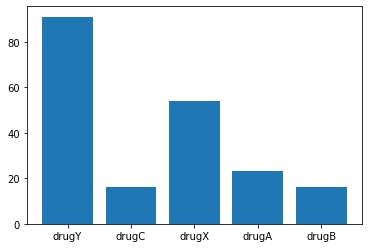

In [109]:
instances=[None] * len(classes)
index=0
for drug in classes:
    instances[index]=np.array(len(df['Drug'].loc[df['Drug']==drug]))
    index+=1
    
drugFig = plt.figure()
plt.bar(classes,instances)
drugFig.savefig('drug-distribution.pdf', dpi=drugFig.dpi)

4. Convert all ordinal and nominal features in numerical format. Make sure that your converted format respects the ordering of ordinal features, and does not introduce any ordering for nominal features. You may want to take a look at pandas.get dummies and pandas. Categorical to do this.

In [110]:

sex = pd.get_dummies(df['Sex'])
df_new = sex

age = pd.get_dummies(df['Age'])
df_new = pd.concat([df_new, age], axis=1)

bp = pd.get_dummies(df['BP'])
df_new = pd.concat([df_new, age], axis=1)

chol = pd.get_dummies(df['Cholesterol'])
df_new = pd.concat([df_new, chol], axis=1)

nak = pd.get_dummies(df['Na_to_K'])
df_new = pd.concat([df_new, nak], axis=1)

df_new.head()

,F,M,15,16,17,18,19,20,21,22,...,31.686,31.876,32.922,33.486,33.542,34.686,34.997,35.639,37.188,38.247
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


5. Split the dataset using train test split using the default parameter values

In [111]:
X=df_new
y=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=None)

6. Run 6 different classifiers:

(a) NB: a Gaussian Naive Bayes Classifier (naive bayes.GaussianNB) with the default parameters.

In [112]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['drugB', 'drugX', 'drugB', 'drugY', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugX', 'drugA', 'drugX', 'drugA', 'drugC', 'drugX',
       'drugX', 'drugB', 'drugX', 'drugA', 'drugB', 'drugC', 'drugC',
       'drugX', 'drugX', 'drugA', 'drugC', 'drugC', 'drugC', 'drugB',
       'drugY', 'drugA', 'drugA', 'drugX', 'drugY', 'drugA', 'drugC',
       'drugB', 'drugX', 'drugB', 'drugB', 'drugX'], dtype='<U5')

(b) Base-DT: a Decision Tree (tree.DecisionTreeClassifier) with the default parameters.

In [115]:
dclf = DecisionTreeClassifier(random_state=0)
dclf.fit(X_train, y_train)
val_pred = dclf.predict(X_test)
val_pred

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugA', 'drugC', 'drugY',
       'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugC',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugY'], dtype=object)